In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
% matplotlib inline

In [19]:
mean1 = [1,0]
cov1 = [[1,0.1],[0.1,2]]

distance1 = np.random.multivariate_normal(mean1,cov1,500)

print(distance1.shape)

mean2 = [4,5]
cov2 = [[1,0.1],[0.1,2]]

distance2 = np.random.multivariate_normal(mean2,cov2,500)

print(distance2.shape)



(500, 2)
(500, 2)


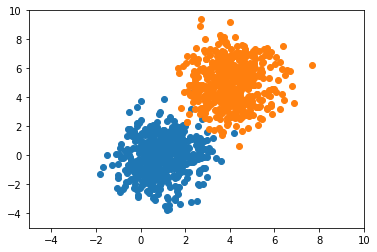

In [20]:
plt.xlim(-5,10) # values will not change if graph change
plt.ylim(-5,10)

plt.scatter(distance1[:,0],distance1[:,1]) #(distance1[all rows:radius],distance1[all rows:weight])
plt.scatter(distance2[:,0],distance2[:,1])

plt.show()

In [21]:
data = np.zeros((1000,3))

In [22]:
data

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [23]:
data[:500,:2] = distance1
data[500:,:2] = distance2
data[500:,-1] = 1

In [24]:
data

array([[ 0.27499155, -0.08818111,  0.        ],
       [ 0.74826214, -0.23510643,  0.        ],
       [ 1.54661205,  0.344226  ,  0.        ],
       ...,
       [ 4.91584367,  3.76121257,  1.        ],
       [ 5.98576234,  4.54299234,  1.        ],
       [ 5.37084133,  2.54508822,  1.        ]])

In [25]:
data.shape

(1000, 3)

In [26]:
data.mean(axis=0)

array([2.50233974, 2.45486443, 0.5       ])

In [27]:
np.random.shuffle(data)

In [28]:
data

array([[-0.60088561,  1.32237416,  0.        ],
       [ 4.26473602,  3.95858462,  1.        ],
       [ 2.96995359,  5.29395987,  1.        ],
       ...,
       [-1.02734438, -1.35762361,  0.        ],
       [ 2.57002497,  2.05299081,  0.        ],
       [ 0.25969943, -0.56786736,  0.        ]])

### Distributing the data for training and testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data[:,:2], data[:,-1]) #(data[feature],data[target])

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


In [31]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

print(neigh.predict([[6,2]]))

print(100*neigh.score(X_test, y_test))

[1.]
99.6


In [32]:
def acc(k):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    return 100*neigh.score(X_test, y_test)

### Linear Search

In [33]:
high = []
for k in range(1,50):
    
    print(f"For k={k} Accuracy={acc(k)}")
    
    high.append([acc(k)])
    hi = max(high)
    
    a = [i for i, j in enumerate(high) if j == hi]
    a = np.asarray(a) + 1
    
print(f"The maximum accuracy {hi} for k = {a}")

For k=1 Accuracy=98.4
For k=2 Accuracy=98.4
For k=3 Accuracy=99.2
For k=4 Accuracy=99.6
For k=5 Accuracy=99.6
For k=6 Accuracy=99.6
For k=7 Accuracy=99.6
For k=8 Accuracy=99.6
For k=9 Accuracy=99.6
For k=10 Accuracy=99.6
For k=11 Accuracy=99.2
For k=12 Accuracy=99.6
For k=13 Accuracy=99.6
For k=14 Accuracy=99.6
For k=15 Accuracy=99.2
For k=16 Accuracy=99.6
For k=17 Accuracy=99.6
For k=18 Accuracy=99.6
For k=19 Accuracy=99.6
For k=20 Accuracy=99.6
For k=21 Accuracy=99.6
For k=22 Accuracy=99.6
For k=23 Accuracy=99.6
For k=24 Accuracy=99.6
For k=25 Accuracy=99.2
For k=26 Accuracy=99.2
For k=27 Accuracy=99.2
For k=28 Accuracy=99.2
For k=29 Accuracy=99.2
For k=30 Accuracy=99.6
For k=31 Accuracy=99.6
For k=32 Accuracy=99.6
For k=33 Accuracy=99.6
For k=34 Accuracy=99.6
For k=35 Accuracy=99.6
For k=36 Accuracy=99.6
For k=37 Accuracy=99.6
For k=38 Accuracy=99.6
For k=39 Accuracy=99.6
For k=40 Accuracy=99.6
For k=41 Accuracy=99.6
For k=42 Accuracy=99.6
For k=43 Accuracy=99.6
For k=44 Accuracy=99

### Binary Search

In [34]:
def findMax(arr, low, high): 
  
    # This condition is for the case when 
    # array is not rotated at all 
    if (high < low): 
        return arr[0] 
  
    # If there is only one element left 
    if (high == low): 
        return arr[low] 
  
    # Find mid 
    mid = low + (high - low) // 2
  
    # Check if mid itself is maximum element 
    if (mid < high and arr[mid + 1] < arr[mid]): 
        return arr[mid] 
      
    # Decide whether we need to go to 
    # the left half or the right half 
    
    if (arr[low] > arr[mid]): 
        return findMax(arr, low, mid - 1)
    else: 
        return findMax(arr, mid + 1, high)

In [92]:
first = 1
end = 100


arr = []

for k in range(first,end):
    arr.append([acc(k)])

n = len(arr)

result = findMax(arr, 0, n - 1) 
# print(result)
res_list = [] 
for i in range(0, n-1) : 
    if arr[i] == result : 
        res_list.append(i)
        
res_list = np.asarray(res_list)
res_list = res_list+1
print (f"Accuracy = {result} for k = {res_list}") 

Accuracy = [99.6] for k = [ 4  5  6  7  8  9 10 12 13 14 16 17 18 19 20 21 22 23 24 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]


[ 4  5  6  7  8  9 10 12 13 14 16 17 18 19 20 21 22 23 24 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98]


### Hybrid Search

In [145]:
#Range (1 to 10000) i.e (1, 10, 100, 1000, 10,000)
exponent = 3
number = 10
power = 1

k=[]
highest_acc = []
for i in range(1, exponent+1):
    highest_acc.append(acc(power))
    k.append(power)
    print(f"For k={power} Accuracy={acc(power)}")
    power = power * number

n = len(highest_acc)
max_ac = max(highest_acc)

m = [i for i,e in enumerate(highest_acc) if highest_acc[i] == max_ac]

key = [ i for i in k for j in m if j== k.index(i)]
        
print (f"Highest Accuracy = {result} for k = {key}") 

For k=1 Accuracy=98.4
For k=10 Accuracy=99.6
For k=100 Accuracy=99.6
Highest Accuracy = [99.6] for k = [10, 100]
